# Лабораторна робота №3  
## Тема:  Аналіз складності алгоритмів. Алгоритми сортування
### **Студент:** Варакута Олександр 
### **Група:** КІ-24-1 

## Мета роботи

Ознайомитися з поняттям асимптотичної складності алгоритмів, виконати
теоретичний та експериментальний аналіз алгоритмів сортування методом
вставляння та методом бульбашки.


## Теоретичні відомості
Асимптотична складність алгоритму характеризує залежність часу виконання
алгоритму від розміру вхідних даних при їх значному зростанні.
Для оцінювання складності використовується O-нотація, яка задає верхню
межу росту функції складності.


### Сортування методом вставляння

Алгоритм сортування методом вставляння формує відсортовану частину масиву,
послідовно вставляючи кожний наступний елемент у відповідну позицію.

Асимптотична складність:
- найгірший випадок – O(n²);
- середній випадок – O(n²);
- найкращий випадок (відсортований масив) – O(n).


In [ ]:
def insertion_sort(arr):
    for j in range(1, len(arr)):
        key = arr[j]
        i = j - 1
        while i >= 0 and arr[i] > key:
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = key
    return arr


### Сортування методом бульбашки

Алгоритм бульбашкового сортування багаторазово проходить по масиву,
порівнюючи сусідні елементи та міняючи їх місцями у разі неправильного порядку.

Асимптотична складність:
- найгірший випадок – O(n²);
- середній випадок – O(n²);
- найкращий випадок (з оптимізацією) – O(n).

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


## Експериментальне дослідження часової складності


In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Алгоритми сортування
def insertion_sort(arr):
    for j in range(1, len(arr)):
        key = arr[j]
        i = j - 1
        while i >= 0 and arr[i] > key:
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = key

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]


# Вимір часу

def measure_time(sort_func, arr, repeats=1):
    total = 0.0
    for _ in range(repeats):
        data = arr.copy()
        start = time.perf_counter()
        sort_func(data)
        total += (time.perf_counter() - start)
    return total / repeats


sizes = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000]

insert_times = []
bubble_times = []


# Експеримент
for n in sizes:
    data = [random.randint(0, 10000) for _ in range(n)]

    repeats = 5 if n <= 2000 else 1

    insert_times.append(measure_time(insertion_sort, data, repeats=repeats))

    # Bubble sort — тільки для малих n
    if n <= 5000:
        bubble_times.append(measure_time(bubble_sort, data, repeats=repeats))
    else:
        bubble_times.append(None)


# Графік
plt.figure(figsize=(8, 5))
plt.plot(sizes, insert_times, marker="o", label="Insertion sort")

bubble_sizes = [sizes[i] for i in range(len(sizes)) if bubble_times[i] is not None]
bubble_valid = [t for t in bubble_times if t is not None]
plt.plot(bubble_sizes, bubble_valid, marker="o", label="Bubble sort")

plt.xlabel("Розмір масиву (n)")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння алгоритмів сортування")
plt.grid(True)
plt.legend()
plt.show()



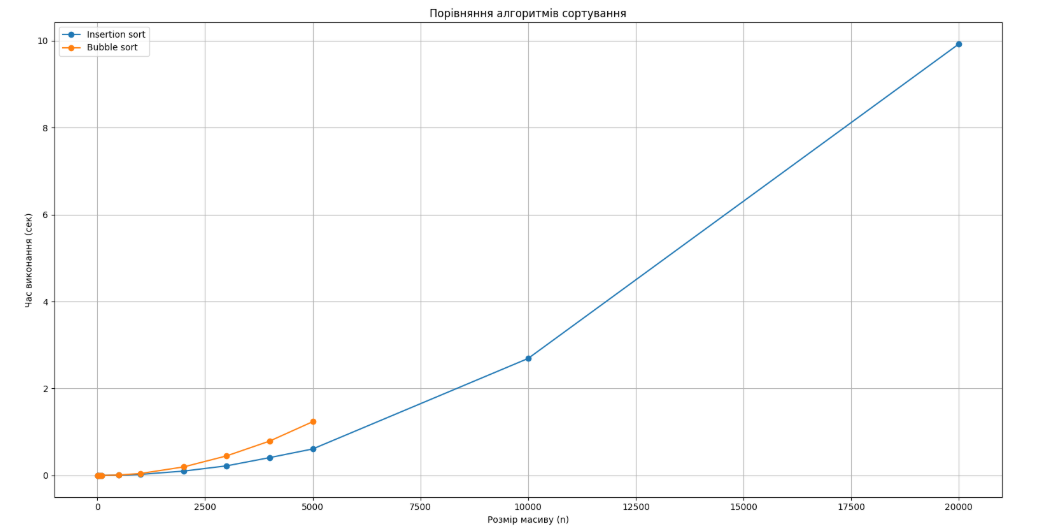

З отриманого графіка видно, що час виконання алгоритмів сортування
методом вставляння та методом бульбашки зростає нелінійно зі збільшенням
розміру масиву, що відповідає їх асимптотичній складності O(n²).

Алгоритм сортування методом бульбашки працює повільніше за алгоритм
сортування методом вставляння, особливо при збільшенні значення n.
Це пояснюється більшою кількістю порівнянь і перестановок у
бульбашковому сортуванні.

Для значень n > 5000 бульбашкове сортування не досліджувалося через
надмірний час виконання, що робить експеримент практично недоцільним
у середовищі Python.


## Контрольні питання

### 1. Що таке O-нотація і чим вона відрізняється від Ω-нотації?

**O-нотація (Big-O)** використовується для задання *верхньої межі* часової складності алгоритму.  
Алгоритм має складність `O(g(n))`, якщо існують такі константи `C > 0` та `n₀`, що для всіх  
`n ≥ n₀` виконується нерівність:

$$
T(n) \le C \cdot g(n)
$$

Це означає, що починаючи з деякого розміру вхідних даних час виконання алгоритму
не зростає швидше, ніж функція $g(n)$ з точністю до сталої множини.

**Ω-нотація (Big-Omega)** задає *нижню межу* часової складності.  
Алгоритм має складність `Ω(g(n))`, якщо існують константи `c > 0` та `n₀`, що для всіх  
`n ≥ n₀` виконується:

$$
T(n) \ge c \cdot g(n)
$$

Тобто час виконання алгоритму не може бути меншим за $g(n)$ починаючи з деякого $n$.

Таким чином:
- $O(g(n))$ — верхня оцінка складності;
- $\Omega(g(n))$ — нижня оцінка складності.

---

### 2. Яку складність має сортування методом вставляння у найкращому випадку?

Найкращий випадок для алгоритму сортування методом вставляння виникає тоді,
коли вхідний масив уже відсортований у зростаючому порядку.

У цьому випадку внутрішній цикл перевірки виконується лише один раз для кожного
елемента, без зсуву інших елементів. Зовнішній цикл виконується $n - 1$ разів,
і кожна ітерація містить лише константну кількість операцій.

Отже, кількість операцій пропорційна розміру масиву:

$$
T(n) \sim n
$$

Асимптотична складність у найкращому випадку:

$$
O(n)
$$

---

### 3. Що таке ефективний алгоритм?

Ефективний алгоритм — це алгоритм, який розв’язує поставлену задачу з мінімальними
витратами обчислювальних ресурсів, насамперед часу та пам’яті.

Ефективність алгоритму оцінюється:
- часовою складністю;
- просторовою складністю;
- швидкістю зростання складності зі збільшенням розміру вхідних даних.

Алгоритм вважається ефективним, якщо його асимптотична складність зростає
якомога повільніше.

---

### 4. Що таке головний параметр задачі?

Головний параметр задачі — це величина, яка характеризує розмір вхідних даних
і від якої безпосередньо залежить складність алгоритму.

Зазвичай головним параметром є:
- кількість елементів масиву;
- довжина рядка;
- кількість вершин або ребер графа.

Саме через головний параметр складність алгоритму записують у вигляді функції $T(n)$.

---

### 5. $F(N) = N^3 + 7N^2 - 14N$. Записати асимптотичну складність у O-нотації

Розглянемо функцію:

$$
F(N) = N^3 + 7N^2 - 14N
$$

При великих значеннях $N$ домінуючим членом є $N^3$, оскільки він зростає швидше,
ніж $N^2$ та $N$.

Для всіх $N \ge 1$ виконується:

$$
7N^2 \le 7N^3,\quad -14N \le 0
$$

Тоді:

$$
F(N) = N^3 + 7N^2 - 14N \le N^3 + 7N^3 = 8N^3
$$

Отже, існує така стала $C = 8$, що:

$$
F(N) \le C \cdot N^3
$$

Згідно з означенням O-нотації, асимпптотична складність функції дорівнює:

$$
O(N^3)
$$
